In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

D:\python\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.4.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/',one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
len(data.train.labels)

55000

In [5]:
len(data.test.labels)

10000

In [6]:
len(data.validation.labels)

5000

In [7]:
data.test.labels[0:5,:].argmax(1)

array([7, 2, 1, 0, 4], dtype=int64)

In [8]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [9]:
data.test.cls

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
img_size = 28
img_size_flat = img_size*img_size
img_shape = (img_size, img_size)
num_classes = 10

In [11]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) ==9
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            Xlabel = "True: {0}".format(cls_true[i])
        else:
            Xlabel = "True: {0}, Pred: {1}".format(cls_true[i],cls_pred[i])
        ax.set_xlabel(Xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])  #去掉坐标轴
    plt.show()

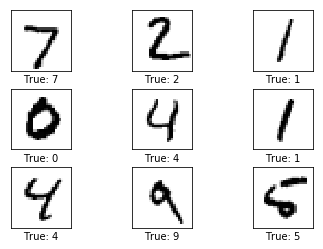

In [12]:
imgs = data.test.images[:9]
cls_true = data.test.cls[:9]
plot_images(imgs, cls_true)

In [13]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [14]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
bias =  tf.Variable(tf.zeros([num_classes]))

In [15]:
logits = tf.matmul(x, weights) + bias  # 预测结果

In [16]:
y_pred = tf.nn.softmax(logits)  #选取概率最大的
y_pred_cls = tf.argmax(y_pred, axis=1) #one-hot -> int

In [17]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

In [18]:
cost = tf.reduce_mean(cross_entropy)

In [58]:
optim = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)

In [59]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [60]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [61]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch_size = 100

In [62]:
def train(num_iterations):
    for i in range(num_iterations):
        x_batch, y_batch = data.train.next_batch(batch_size)
        feed_dict_train = {
            x:x_batch,
            y_true:y_batch
        }
        
        sess.run(optim, feed_dict=feed_dict_train)

In [63]:
feed_dict_test = {
    x:data.test.images,
    y_true:data.test.labels,
    y_true_cls:data.test.cls
}

In [64]:
def print_accuracy():
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    print("accuracy on test-set: {0:.1%}".format(acc))

In [65]:
def print_confusion_matrix():
    cls_true = data.test.cls
    cls_pred = sess.run(y_pred_cls,feed_dict=feed_dict_test)
    
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest')
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Prediction')
    plt.ylabel('True')
    
    plt.show()

In [66]:
def plot_example_errors():
    
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls],feed_dict=feed_dict_test)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    plot_images(
        images=images[:9],
        cls_true = cls_true[:9],
        cls_pred = cls_pred[:9]
    )

In [67]:
def plot_weights():
    W = sess.run(weights)
    
    w_min = np.min(W)
    w_max = np.max(W)
    
    fig, axes = plt.subplots(3,4)
    fig.subplots_adjust(hspace=0.3,wspace=0.4)
    
    for i, ax in enumerate(axes.flat):
        if i<10:
            image = W[:,i].reshape(img_shape)
            ax.set_xlabel('Weights: {0}'.format(i))
            ax.imshow(image, vmin=w_min,vmax=w_max,cmap='seismic')
            
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [68]:
print_accuracy()

accuracy on test-set: 9.8%


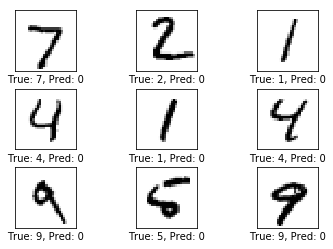

In [69]:
plot_example_errors()

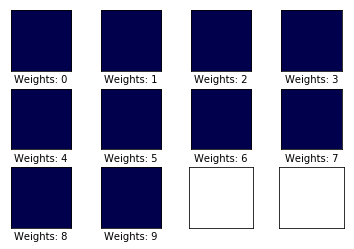

In [70]:
plot_weights()

In [71]:
train(num_iterations=9)

In [72]:
print_accuracy()

accuracy on test-set: 77.0%


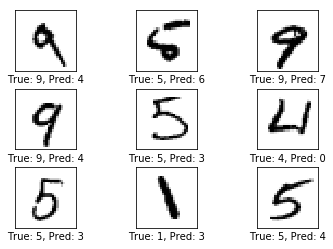

In [73]:
plot_example_errors()

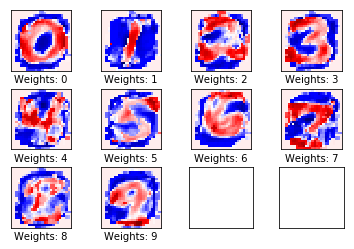

In [74]:
plot_weights()

In [75]:
train(1000)

In [76]:
print_accuracy()

accuracy on test-set: 89.5%


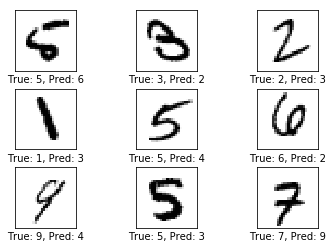

In [77]:
plot_example_errors()

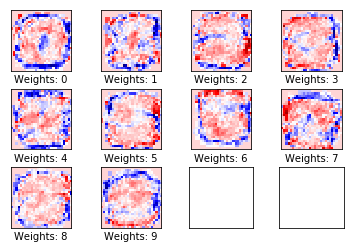

In [78]:
plot_weights()

[[ 930    0    3    9    0    5   23    3    6    1]
 [   0 1092    6   14    1    3    4    1   12    2]
 [   3    1  940   34    5    1   10    8   22    8]
 [   0    0   18  947    0    5    3   11   10   16]
 [   1    0   12    2  864    0   16    9    6   72]
 [  10    4   17  115   20  640   20    7   46   13]
 [   5    3   21    1    5    9  910    2    2    0]
 [   0    7   20    9    5    2    0  882    3  100]
 [   2    6   23   48   17   10   13    6  806   43]
 [   4    1    3   17   25    3    0   14    4  938]]


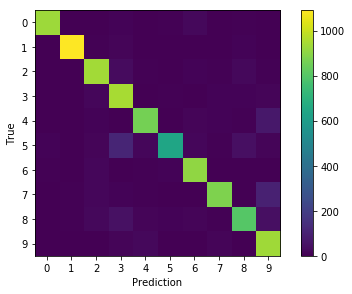

In [79]:
print_confusion_matrix()